In [1]:
# Please take note that only 731 patients out of 1229 went through diagnostic imaging. 
import pandas as pd 
df = pd.read_csv('ER - Patient Log.csv')

In [2]:
df

,HCID,Patient Admitting - Check In,Patient Triagne Nurse Visit,Patient Admit to ER
0,1805294,2019-01-12 2:14:00,2019-01-12 2:24:00,2019-01-12 2:26:00
1,2233815,2019-01-21 12:17:25,2019-01-21 12:39:25,2019-01-21 13:10:25
2,1043375,2019-01-22 0:50:36,2019-01-22 0:56:36,2019-01-22 1:18:36
3,1203917,2019-01-29 15:43:00,2019-01-29 15:57:00,2019-01-29 16:09:00
4,2616633,2019-01-30 1:58:47,2019-01-30 2:28:47,2019-01-30 3:23:47
...,...,...,...,...
1224,1547397,2021-01-19 3:48:00,2021-01-19 4:01:00,2021-01-19 4:40:00
1225,2250377,2021-02-05 17:07:05,2021-02-05 17:22:05,2021-02-05 17:46:05
1226,2803120,2021-02-07 11:44:00,2021-02-07 12:01:00,2021-02-07 12:26:00
1227,1602995,2021-02-08 4:00:00,2021-02-08 4:21:00,2021-02-08 4:30:00


## Using targets of patients seen by a triage nurse within 20minutes and 60 minutes for patients admited to the Emergency Room as KPI

##### Patients seen by a triage nurse within 20 minutes.

In [3]:
df['Patient Triagne Nurse Visit']= pd.to_datetime(df['Patient Triagne Nurse Visit'])

df['Patient Admitting - Check In']= pd.to_datetime(df['Patient Admitting - Check In'])

df['PatientTN'] = (df['Patient Triagne Nurse Visit'] - df['Patient Admitting - Check In'])

df.head()

,HCID,Patient Admitting - Check In,Patient Triagne Nurse Visit,Patient Admit to ER,PatientTN
0,1805294,2019-01-12 02:14:00,2019-01-12 02:24:00,2019-01-12 2:26:00,0 days 00:10:00
1,2233815,2019-01-21 12:17:25,2019-01-21 12:39:25,2019-01-21 13:10:25,0 days 00:22:00
2,1043375,2019-01-22 00:50:36,2019-01-22 00:56:36,2019-01-22 1:18:36,0 days 00:06:00
3,1203917,2019-01-29 15:43:00,2019-01-29 15:57:00,2019-01-29 16:09:00,0 days 00:14:00
4,2616633,2019-01-30 01:58:47,2019-01-30 02:28:47,2019-01-30 3:23:47,0 days 00:30:00


In [4]:
df['Patient Admitting - Check In']= pd.to_datetime(df['Patient Admitting - Check In'])

PatientTN = df[ df['PatientTN'].dt.total_seconds() / 60.0 <= 20.0]

PatientsIn20M = PatientTN.groupby(['HCID']).sum().count()

PatientsIn20M

C:\Users\samoo\AppData\Local\Temp\ipykernel_45176\1677592449.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  PatientsIn20M = PatientTN.groupby(['HCID']).sum().count()


Patient Admit to ER    652
PatientTN              652
dtype: int64

##### Patients admitted to the ER in 60 minutes.

In [5]:
df['Patient Admit to ER']= pd.to_datetime(df['Patient Admit to ER'])

df['PatientER'] = df['Patient Admit to ER'] - df['Patient Admitting - Check In']

PatientER = df[df['PatientER'].dt.total_seconds() / 60.0 <= 60.0]

PatientsIn60M = PatientER.groupby(['HCID']).sum().count()

PatientsIn60M 

C:\Users\samoo\AppData\Local\Temp\ipykernel_45176\1999396902.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  PatientsIn60M = PatientER.groupby(['HCID']).sum().count()


PatientTN    877
PatientER    877
dtype: int64

In [6]:
print('Patients seen by a triage nurse within 20 minutes -', len(PatientTN))
PatientDTN = df[ df['PatientTN'].dt.total_seconds() / 60.0 > 20.0]
print('Patients not seen by a triage nurse within 20 minutes -', len(PatientDTN))
print('Patients admitted to the ER in 60 minutes -', len(PatientER))
PatientDER= df[ df['PatientER'].dt.total_seconds() / 60.0 > 60.0]
print('Patients not admitted to the ER in 60 minutes -', len(PatientDER))

Patients seen by a triage nurse within 20 minutes - 652
Patients not seen by a triage nurse within 20 minutes - 577
Patients admitted to the ER in 60 minutes - 877
Patients not admitted to the ER in 60 minutes - 352


In [7]:
# dfMerge is a merge of both Diagnostic Imaging dataset & OR dataset on HCID data column 

df1  = pd.read_excel('DI - Visits 1.3.xlsx')
df2 = pd.read_excel('DI - Visits 2.3.xlsx')
df3 = pd.read_excel('DI - Visits 3.3.xlsx')
dfOR = pd.read_csv('OR_booking_Mod.csv')

dfDI = pd.concat([df1,df2,df3])

dfMerge= pd.merge(dfDI, dfOR, left_on='HCID', right_on='HCID ')

dfMerge = dfMerge.drop(['HCID ', 'Pt Age_y'], axis=1) 

dfMerge

,HCID,Pt Age_x,DI Req - Time,Requesting Physician,Req Type - Abdominal,DI - Pt in Suite,Proc Descr Mod,Req Proc Tm,Pt Priority,OR Booking Req DT/Tm,...,Pt OR Chk In,Pt In OR,OR,Pt Trns,ORR#,Surgery_By,Proc_DateTime,Performance,Measure,Wait_SugeryStart
0,2233815,58.0,2019-01-21 15:43:24.757,Dr. S,ABD,2019-01-21 15:55:06.378,Laparoscopy Cholecystectomy,60,1 days 00:00:00,2019-01-21 17:12:00,...,18:27,19:05,5,PARU,1065535,2019-01-22 17:12:00,2019-01-21 19:05:00,0 days 01:53:00,Early,-1 days +01:53:00
1,1043375,31.0,2019-01-22 01:19:36.383,Dr. S,ABD,2019-01-22 02:53:00.812,Laparoscopy Appendectomy,60,0 days 06:00:00,2019-01-22 03:30:00,...,07:50,08:00,5,PARU,1065583,2019-01-22 09:30:00,2019-01-22 08:00:00,0 days 04:30:00,Early,-1 days +22:30:00
2,2616633,46.0,2019-01-30 03:25:46.939,Dr. O,ABD,2019-01-30 04:59:48.144,Laparoscopy Appendectomy,,0 days 06:00:00,2019-01-30 05:30:00,...,07:40,08:00,10,PARU,1065660,2019-01-30 11:30:00,2019-01-30 08:00:00,0 days 02:30:00,Early,-1 days +20:30:00
3,1500970,69.0,2019-02-08 23:15:43.196,Dr. D,ABD,2019-02-09 00:44:23.955,Laparoscopy Cholecystectomy,60,1 days 00:00:00,2019-02-09 01:00:00,...,13:25,13:35,8,PARU,1065741,2019-02-10 01:00:00,2019-02-11 13:35:00,2 days 12:35:00,Delay,1 days 12:35:00
4,1642088,51.0,2019-02-24 18:11:43.435,Dr. S,ABD,2019-02-24 20:34:59.896,Laparoscopy Appendectomy,60,0 days 06:00:00,2019-02-24 21:28:00,...,01:55,02:20,9,PARU,1065891,2019-02-25 03:28:00,2019-02-25 02:20:00,0 days 04:52:00,Early,-1 days +22:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1867742,27.0,2020-12-15 13:36:55.194,Dr. J,ABD,2020-12-15 14:02:58.595,Laparoscopy Cholecystectomy,60,1 days 00:00:00,2020-12-15 15:25:00,...,18:47,19:08,9,PARU,1100529,2020-12-16 15:25:00,2020-12-15 19:08:00,0 days 03:43:00,Early,-1 days +03:43:00
727,2926283,39.0,2020-12-21 13:55:51.539,Dr. D,ABD,2020-12-21 17:01:31.484,Laparoscopy Cholecystectomy,60,1 days 00:00:00,2020-12-21 17:30:00,...,21:01,21:30,5,PARU,1100597,2020-12-22 17:30:00,2020-12-22 21:30:00,1 days 04:00:00,Delay,0 days 04:00:00
728,1212201,56.0,2020-12-30 07:43:18.750,Dr. J,ABD,2020-12-30 08:46:17.757,Laparoscopy Cholecystectomy,60,1 days 12:00:00,2020-12-30 10:25:00,...,18:30,19:17,5,PARU,1100635,2020-12-31 22:25:00,2021-01-01 19:17:00,2 days 08:52:00,Delay,0 days 20:52:00
729,1866669,30.0,2021-01-08 18:07:32.974,Dr. P,ABD,2021-01-08 18:18:20.268,Laparoscopy Cholecystectomy,60,1 days 12:00:00,2021-01-08 18:43:00,...,13:38,14:13,9,PARU,1100749,2021-01-10 06:43:00,2021-01-10 14:13:00,1 days 19:30:00,Delay,0 days 07:30:00


In [8]:
# dfMerge1 is a merge of dfMerge & ER dataset on HCID column

dfMerge1= pd.merge(df, dfMerge, left_on='HCID', right_on='HCID')

dfMerge1

,HCID,Patient Admitting - Check In,Patient Triagne Nurse Visit,Patient Admit to ER,PatientTN,PatientER,Pt Age_x,DI Req - Time,Requesting Physician,Req Type - Abdominal,...,Pt OR Chk In,Pt In OR,OR,Pt Trns,ORR#,Surgery_By,Proc_DateTime,Performance,Measure,Wait_SugeryStart
0,2233815,2019-01-21 12:17:25,2019-01-21 12:39:25,2019-01-21 13:10:25,0 days 00:22:00,0 days 00:53:00,58.0,2019-01-21 15:43:24.757,Dr. S,ABD,...,18:27,19:05,5,PARU,1065535,2019-01-22 17:12:00,2019-01-21 19:05:00,0 days 01:53:00,Early,-1 days +01:53:00
1,1043375,2019-01-22 00:50:36,2019-01-22 00:56:36,2019-01-22 01:18:36,0 days 00:06:00,0 days 00:28:00,31.0,2019-01-22 01:19:36.383,Dr. S,ABD,...,07:50,08:00,5,PARU,1065583,2019-01-22 09:30:00,2019-01-22 08:00:00,0 days 04:30:00,Early,-1 days +22:30:00
2,2616633,2019-01-30 01:58:47,2019-01-30 02:28:47,2019-01-30 03:23:47,0 days 00:30:00,0 days 01:25:00,46.0,2019-01-30 03:25:46.939,Dr. O,ABD,...,07:40,08:00,10,PARU,1065660,2019-01-30 11:30:00,2019-01-30 08:00:00,0 days 02:30:00,Early,-1 days +20:30:00
3,1500970,2019-02-08 21:10:43,2019-02-08 21:30:43,2019-02-08 21:32:43,0 days 00:20:00,0 days 00:22:00,69.0,2019-02-08 23:15:43.196,Dr. D,ABD,...,13:25,13:35,8,PARU,1065741,2019-02-10 01:00:00,2019-02-11 13:35:00,2 days 12:35:00,Delay,1 days 12:35:00
4,1642088,2019-02-24 14:34:43,2019-02-24 14:55:43,2019-02-24 15:34:43,0 days 00:21:00,0 days 01:00:00,51.0,2019-02-24 18:11:43.435,Dr. S,ABD,...,01:55,02:20,9,PARU,1065891,2019-02-25 03:28:00,2019-02-25 02:20:00,0 days 04:52:00,Early,-1 days +22:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1867742,2020-12-15 10:53:55,2020-12-15 11:09:55,2020-12-15 11:42:55,0 days 00:16:00,0 days 00:49:00,27.0,2020-12-15 13:36:55.194,Dr. J,ABD,...,18:47,19:08,9,PARU,1100529,2020-12-16 15:25:00,2020-12-15 19:08:00,0 days 03:43:00,Early,-1 days +03:43:00
727,2926283,2020-12-21 10:48:52,2020-12-21 11:14:52,2020-12-21 11:54:52,0 days 00:26:00,0 days 01:06:00,39.0,2020-12-21 13:55:51.539,Dr. D,ABD,...,21:01,21:30,5,PARU,1100597,2020-12-22 17:30:00,2020-12-22 21:30:00,1 days 04:00:00,Delay,0 days 04:00:00
728,1212201,2020-12-30 06:30:19,2020-12-30 06:42:19,2020-12-30 07:36:19,0 days 00:12:00,0 days 01:06:00,56.0,2020-12-30 07:43:18.750,Dr. J,ABD,...,18:30,19:17,5,PARU,1100635,2020-12-31 22:25:00,2021-01-01 19:17:00,2 days 08:52:00,Delay,0 days 20:52:00
729,1866669,2021-01-08 16:08:33,2021-01-08 16:25:33,2021-01-08 16:57:33,0 days 00:17:00,0 days 00:49:00,30.0,2021-01-08 18:07:32.974,Dr. P,ABD,...,13:38,14:13,9,PARU,1100749,2021-01-10 06:43:00,2021-01-10 14:13:00,1 days 19:30:00,Delay,0 days 07:30:00


In [9]:
dfMerge1.dtypes

HCID                                      int64
Patient Admitting - Check In     datetime64[ns]
Patient Triagne Nurse Visit      datetime64[ns]
Patient Admit to ER              datetime64[ns]
PatientTN                       timedelta64[ns]
PatientER                       timedelta64[ns]
Pt Age_x                                float64
DI Req - Time                    datetime64[ns]
Requesting Physician                     object
Req Type - Abdominal                     object
DI - Pt in Suite                 datetime64[ns]
Proc Descr Mod                           object
Req Proc Tm                              object
Pt Priority                              object
OR Booking Req DT/Tm                     object
Pt Loc                                   object
Proc DT                                  object
Pt OR Chk In                             object
Pt In OR                                 object
OR                                        int64
Pt Trns                                 

## Average time for the patient journey from the time they are checked in at admitting to when they have surgery? 
Please take note of two answers with explanations

In [10]:
# Average time for 731 patients who went through diagnostic imaging before surgery procedure 

dfMerge1['Surgery_By']= pd.to_datetime(dfMerge1['Surgery_By'])

(dfMerge1['Surgery_By']- dfMerge1['Patient Admitting - Check In']).mean()

Timedelta('1 days 04:58:09.897400820')

In [11]:
# This calculation is from merging only OR & ER datasets inclusive of patients who didn't go through Diagnostic Imaging 
# This therefore reduces the overall average time
# Total of 1229 inclusive of both DI & non-DI patients before surgery procedure
# Load the ER data into a Pandas dataframe
df_ER = pd.read_csv('ER - Patient Log.csv')

# Load the OR Booking data into a Pandas dataframe
df_OR = pd.read_csv('OR_booking_Mod.csv')


# Merge the ER and OR Booking data on a common identifier (HCID)
trial_data = pd.merge(df_ER, df_OR, left_on='HCID', right_on='HCID ', how='inner')

trial_data['Time_Difference'] = pd.to_datetime(trial_data['Proc_DateTime']) - pd.to_datetime(trial_data['Patient Admitting - Check In'])


# Convert the time difference column to minutes
trial_data['Time_Difference'] = trial_data['Time_Difference'].dt.total_seconds() / 60

# Calculate the average time difference
avg_time = trial_data['Time_Difference'].mean()
print('The average time for the patient journey from the time they are checked in at admitting to when they have surgery is:', avg_time,'minutes' )

The average time for the patient journey from the time they are checked in at admitting to when they have surgery is: 1336.618863574723 minutes


## Determining the longest wait between the steps

In [12]:

dfMerge1['check in to Triage Nurse wait time'] = (pd.to_datetime(dfMerge1['Patient Triagne Nurse Visit']) - pd.to_datetime(dfMerge1['Patient Admitting - Check In'])).dt.total_seconds() / 60
avg_step_one = dfMerge1['check in to Triage Nurse wait time'].mean()

dfMerge1['triagne nurse to ER wait time'] = (pd.to_datetime(dfMerge1['Patient Admit to ER']) - pd.to_datetime(dfMerge1['Patient Triagne Nurse Visit'])).dt.total_seconds() / 60
avg_step_two = dfMerge1['triagne nurse to ER wait time'].mean()

dfMerge1['wait time from ER to DI'] = (pd.to_datetime(dfMerge1['DI - Pt in Suite']) - pd.to_datetime(dfMerge1['Patient Admit to ER'])).dt.total_seconds() / 60
avg_step_three = dfMerge1['wait time from ER to DI'].mean()

dfMerge1['wait time from DI to Surgery Procedure'] = (pd.to_datetime(dfMerge1['Surgery_By']) - pd.to_datetime(dfMerge1['DI - Pt in Suite'])).dt.total_seconds() / 60
avg_step_four = dfMerge1['wait time from DI to Surgery Procedure'].mean()

print('Average time from check in to Triage Nurse - ',avg_step_one,'minutes')
print('Average time triagne nurse to ER - ',avg_step_two,'minutes')
print('Average time from ER to DI - ',avg_step_three,'minutes')
print('Average time from DI to Surgery Procedure - ',avg_step_four,'minutes')


Average time from check in to Triage Nurse -  22.177838577291382 minutes
Average time triagne nurse to ER -  30.455540355677154 minutes
Average time from ER to DI -  166.0142143410852 minutes
Average time from DI to Surgery Procedure -  1519.517363406292 minutes


Longest wait between the steps is wait time after diagnostic Imaging to having surgery procedure

In [13]:

step_one_outoftarget = round((len(dfMerge1[dfMerge1["check in to Triage Nurse wait time"] >= 20])/ len(dfMerge1)) *100,2)

step_two_outoftarget = round((len(dfMerge1[dfMerge1["triagne nurse to ER wait time"] >= 40])/ len(dfMerge1)) *100,2)

OR_Booking_Status_delayed = round((len(dfOR[dfOR["Proc_DateTime"] > dfOR["Surgery_By"]])/ len(dfOR)) *100,2)

print('Percentage missing time target from check in to Triage Nurse in 20mins -',step_one_outoftarget,'%')

print('Percentage missing time target from triagne nurse to ER in 40mins -',step_two_outoftarget,'%')

print('Percentage that failed to occur prior to or on OR Booking datetime -',OR_Booking_Status_delayed,'%' )                                                                          


Percentage missing time target from check in to Triage Nurse in 20mins - 50.07 %
Percentage missing time target from triagne nurse to ER in 40mins - 31.33 %
Percentage that failed to occur prior to or on OR Booking datetime - 37.43 %


Patients moving from patient admitting-check in to Triagne Nurse has the highest percentage of missing targets for timeliness






## Investigating for both types of surgery, if visit to Diagnostic Imaging adds a significant amount of time to the overall process?



In [14]:
trial_data1= pd.merge(dfDI, trial_data, left_on='HCID', right_on='HCID ', how='right')

trial_data1


,HCID_x,Pt Age_x,DI Req - Time,Requesting Physician,Req Type - Abdominal,DI - Pt in Suite,HCID_y,Patient Admitting - Check In,Patient Triagne Nurse Visit,Patient Admit to ER,...,Pt In OR,OR,Pt Trns,ORR#,Surgery_By,Proc_DateTime,Performance,Measure,Wait_SugeryStart,Time_Difference
0,NaN,NaN,NaT,NaN,NaN,NaT,1805294,2019-01-12 2:14:00,2019-01-12 2:24:00,2019-01-12 2:26:00,...,10:25,5,PARU,1065487,2019-01-12 09:00:00,2019-01-12 10:25:00,0 days 07:25:00,Delay,0 days 01:25:00,491.000000
1,2233815.0,58.0,2019-01-21 15:43:24.757,Dr. S,ABD,2019-01-21 15:55:06.378,2233815,2019-01-21 12:17:25,2019-01-21 12:39:25,2019-01-21 13:10:25,...,19:05,5,PARU,1065535,2019-01-22 17:12:00,2019-01-21 19:05:00,0 days 01:53:00,Early,-1 days +01:53:00,407.583333
2,1043375.0,31.0,2019-01-22 01:19:36.383,Dr. S,ABD,2019-01-22 02:53:00.812,1043375,2019-01-22 0:50:36,2019-01-22 0:56:36,2019-01-22 1:18:36,...,08:00,5,PARU,1065583,2019-01-22 09:30:00,2019-01-22 08:00:00,0 days 04:30:00,Early,-1 days +22:30:00,429.400000
3,NaN,NaN,NaT,NaN,NaN,NaT,1203917,2019-01-29 15:43:00,2019-01-29 15:57:00,2019-01-29 16:09:00,...,18:05,7,PARU,1065615,2019-01-30 18:12:00,2019-01-30 18:05:00,0 days 23:53:00,Early,-1 days +23:53:00,1582.000000
4,2616633.0,46.0,2019-01-30 03:25:46.939,Dr. O,ABD,2019-01-30 04:59:48.144,2616633,2019-01-30 1:58:47,2019-01-30 2:28:47,2019-01-30 3:23:47,...,08:00,10,PARU,1065660,2019-01-30 11:30:00,2019-01-30 08:00:00,0 days 02:30:00,Early,-1 days +20:30:00,361.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,NaN,NaN,NaT,NaN,NaN,NaT,1547397,2021-01-19 3:48:00,2021-01-19 4:01:00,2021-01-19 4:40:00,...,14:41,9,PARU,1100943,2021-01-19 12:06:00,2021-01-19 14:41:00,0 days 08:35:00,Delay,0 days 02:35:00,653.000000
1225,2250377.0,54.0,2021-02-05 19:43:05.269,Dr. J,ABD,2021-02-05 19:45:42.358,2250377,2021-02-05 17:07:05,2021-02-05 17:22:05,2021-02-05 17:46:05,...,16:40,9,PARU,1100996,2021-02-06 20:15:00,2021-02-06 16:40:00,0 days 20:25:00,Early,-1 days +20:25:00,1412.916667
1226,NaN,NaN,NaT,NaN,NaN,NaT,2803120,2021-02-07 11:44:00,2021-02-07 12:01:00,2021-02-07 12:26:00,...,16:08,10,PARU,1101049,2021-02-09 02:32:00,2021-02-08 16:08:00,1 days 01:36:00,Early,-1 days +13:36:00,1704.000000
1227,NaN,NaN,NaT,NaN,NaN,NaT,1602995,2021-02-08 4:00:00,2021-02-08 4:21:00,2021-02-08 4:30:00,...,09:50,4,,1101074,2021-02-08 11:56:00,2021-02-08 09:50:00,0 days 03:54:00,Early,-1 days +21:54:00,350.000000


In [15]:
# extracting patients in OR booking dataset that didn't go through diagnostic imaging before surgery
# This is 1229 - 731 = 498 patients

df_no_DI = trial_data1[trial_data1['DI - Pt in Suite'].isnull()]

df_no_DI


,HCID_x,Pt Age_x,DI Req - Time,Requesting Physician,Req Type - Abdominal,DI - Pt in Suite,HCID_y,Patient Admitting - Check In,Patient Triagne Nurse Visit,Patient Admit to ER,...,Pt In OR,OR,Pt Trns,ORR#,Surgery_By,Proc_DateTime,Performance,Measure,Wait_SugeryStart,Time_Difference
0,NaN,NaN,NaT,NaN,NaN,NaT,1805294,2019-01-12 2:14:00,2019-01-12 2:24:00,2019-01-12 2:26:00,...,10:25,5,PARU,1065487,2019-01-12 09:00:00,2019-01-12 10:25:00,0 days 07:25:00,Delay,0 days 01:25:00,491.0
3,NaN,NaN,NaT,NaN,NaN,NaT,1203917,2019-01-29 15:43:00,2019-01-29 15:57:00,2019-01-29 16:09:00,...,18:05,7,PARU,1065615,2019-01-30 18:12:00,2019-01-30 18:05:00,0 days 23:53:00,Early,-1 days +23:53:00,1582.0
5,NaN,NaN,NaT,NaN,NaN,NaT,1418671,2019-01-31 11:03:00,2019-01-31 11:27:00,2019-01-31 11:46:00,...,20:47,10,PARU,1065693,2019-01-31 19:39:00,2019-01-31 20:47:00,0 days 07:08:00,Delay,0 days 01:08:00,584.0
7,NaN,NaN,NaT,NaN,NaN,NaT,2401232,2019-02-09 8:31:00,2019-02-09 9:07:00,2019-02-09 9:39:00,...,14:42,12,PARU,1065763,2019-02-09 16:25:00,2019-02-09 14:42:00,0 days 04:17:00,Early,-1 days +22:17:00,371.0
8,NaN,NaN,NaT,NaN,NaN,NaT,2945200,2019-02-13 13:54:00,2019-02-13 14:23:00,2019-02-13 14:49:00,...,20:44,5,PARU,1065783,2019-02-15 05:10:00,2019-02-14 20:44:00,1 days 03:34:00,Early,-1 days +15:34:00,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,NaN,NaN,NaT,NaN,NaN,NaT,2968649,2021-01-18 15:54:00,2021-01-18 16:21:00,2021-01-18 16:35:00,...,07:58,4,PARU,1100888,2021-01-19 00:02:00,2021-01-19 07:58:00,0 days 13:56:00,Delay,0 days 07:56:00,964.0
1224,NaN,NaN,NaT,NaN,NaN,NaT,1547397,2021-01-19 3:48:00,2021-01-19 4:01:00,2021-01-19 4:40:00,...,14:41,9,PARU,1100943,2021-01-19 12:06:00,2021-01-19 14:41:00,0 days 08:35:00,Delay,0 days 02:35:00,653.0
1226,NaN,NaN,NaT,NaN,NaN,NaT,2803120,2021-02-07 11:44:00,2021-02-07 12:01:00,2021-02-07 12:26:00,...,16:08,10,PARU,1101049,2021-02-09 02:32:00,2021-02-08 16:08:00,1 days 01:36:00,Early,-1 days +13:36:00,1704.0
1227,NaN,NaN,NaT,NaN,NaN,NaT,1602995,2021-02-08 4:00:00,2021-02-08 4:21:00,2021-02-08 4:30:00,...,09:50,4,,1101074,2021-02-08 11:56:00,2021-02-08 09:50:00,0 days 03:54:00,Early,-1 days +21:54:00,350.0


In [16]:
df_no_DI['Time_Difference'] = pd.to_datetime(df_no_DI['Surgery_By']) - pd.to_datetime(df_no_DI['Patient Admitting - Check In'])

# Convert the time difference column to minutes
df_no_DI['Time_Difference'] = df_no_DI['Time_Difference'].dt.total_seconds() / 60

# Calculate the average time difference
avg_time = df_no_DI['Time_Difference'].mean()
print('The average time for the patient journey from the time they are checked in at admitting to when they have surgery without diagnostic imaging is:', avg_time,'minutes' )
print(' ')
print('The average time for patients who went through Diagnostic imaging from admitting check-in to when they have surgery is 1738.1649566803474 minutes minutes (1 day 05:01:37.065663474) which is considerably longer')

The average time for the patient journey from the time they are checked in at admitting to when they have surgery without diagnostic imaging is: 844.9497991967871 minutes
 
The average time for patients who went through Diagnostic imaging from admitting check-in to when they have surgery is 1738.1649566803474 minutes minutes (1 day 05:01:37.065663474) which is considerably longer


C:\Users\samoo\AppData\Local\Temp\ipykernel_45176\2768543214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_DI['Time_Difference'] = pd.to_datetime(df_no_DI['Surgery_By']) - pd.to_datetime(df_no_DI['Patient Admitting - Check In'])
C:\Users\samoo\AppData\Local\Temp\ipykernel_45176\2768543214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_DI['Time_Difference'] = df_no_DI['Time_Difference'].dt.total_seconds() / 60


## Further insights from data



In [17]:
appendectomy_data_no_DI = df_no_DI[df_no_DI['Proc Descr Mod'] == 'Laparoscopy Appendectomy']
appendectomy_data_total =  df_OR[df_OR['Proc Descr Mod'] == 'Laparoscopy Appendectomy']
percentage_Appendectomy = ((len(appendectomy_data_no_DI) / len(appendectomy_data_total)) * 100)

cholecystectomy_data_no_DI = df_no_DI[df_no_DI['Proc Descr Mod'] == 'Laparoscopy Cholecystectomy']
cholecystectomy_data_total =  df_OR[df_OR['Proc Descr Mod'] == 'Laparoscopy Cholecystectomy']
percentage_Cholecystectomy = ((len(cholecystectomy_data_no_DI) / len(cholecystectomy_data_total)) * 100)

print("Percentage of Appendectomy patients not going through DI:", percentage_Appendectomy, "%")

print("Percentage of Cholecystectomy patients not going through DI:", percentage_Cholecystectomy, "%")

print(' ')

print('The high percentage for Laparoscopy Appendectomy shows the higher urgency with which patients need this procedure as soon as possible')


Percentage of Appendectomy patients not going through DI: 66.43598615916954 %
Percentage of Cholecystectomy patients not going through DI: 17.51152073732719 %
 
The high percentage for Laparoscopy Appendectomy shows the higher urgency with which patients need this procedure as soon as possible


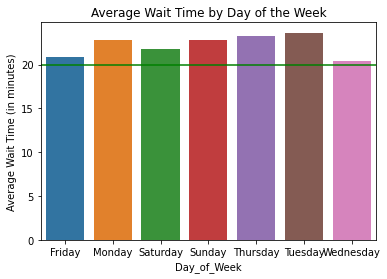

Average wait time is 20


Day_of_Week
Friday       20.885417
Monday       22.780702
Saturday     21.726415
Sunday       22.828571
Thursday     23.256881
Tuesday      23.626506
Wednesday    20.457627
Name: Wait_time, dtype: float64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

# Extract the day of the week from the date column
dfMerge1['Day_of_Week'] = pd.to_datetime(dfMerge1['Patient Triagne Nurse Visit']).dt.dayofweek
dfMerge1 = dfMerge1[pd.to_datetime(dfMerge1['Patient Triagne Nurse Visit'], errors='raise').notna()]

# Map the integer values to the corresponding day of the week
dfMerge1['Day_of_Week'] = dfMerge1['Day_of_Week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

dfMerge1['Patient Triagne Nurse Visit']= pd.to_datetime(dfMerge1['Patient Triagne Nurse Visit'])
dfMerge1['Patient Triagne Nurse Visit']= pd.to_datetime(dfMerge1['Patient Triagne Nurse Visit'])
dfMerge1['Wait_time'] = dfMerge1['Patient Triagne Nurse Visit'] - dfMerge1['Patient Admitting - Check In']
average_wait_time = dfMerge1["Wait_time"].mean()

# Convert the wait time column to minutes
dfMerge1['Wait_time'] = dfMerge1['Wait_time'].dt.total_seconds() / 60

# Calculate the average wait time for all patients
average_wait_time = 20

# Group the data by day of the week and calculate the average wait time for each group
grouped_data = dfMerge1.groupby('Day_of_Week').mean()

# Create a bar plot to compare the average wait time for each day of the week to the overall average wait time
sns.barplot(x=grouped_data.index, y='Wait_time', data=grouped_data)
plt.axhline(y=average_wait_time, color='g', linestyle='-')
plt.ylabel('Average Wait Time (in minutes)')
plt.title('Average Wait Time by Day of the Week')

# Show the plot
plt.show()
print('Average wait time is', average_wait_time)
grouped_data['Wait_time']

Using an average target time of 20min between patient admitting-check in to patient Triagne Nurse visit shows that, there is no particular day of the week this 20min target as an average is fulfilled. There is definitely a bottleneck causing delays in this stage representing 50.07% of 1229 patients.